<h3>Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Loading titanic dataset from seaborn library

In [2]:
titanic=sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<h3>Below boxplot shows that age column some outliers

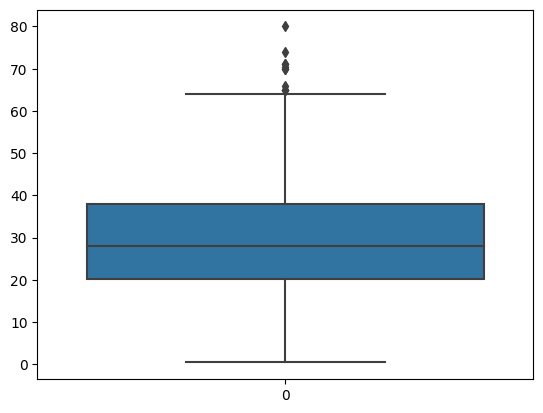

In [7]:
sns.boxplot(titanic.age)
plt.show()

<h3>Plotting Histogram for better visualization of age distribution

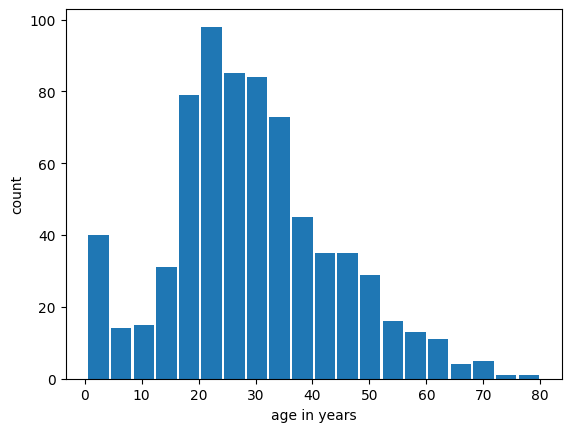

In [55]:
plt.hist(data=titanic,x='age',bins=20,rwidth=0.9)
plt.xlabel('age in years')
plt.ylabel("count")
plt.show()

<h3>Looking for the normal distribution of age column

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_41908\1209150708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.age,bins=20,color='g')


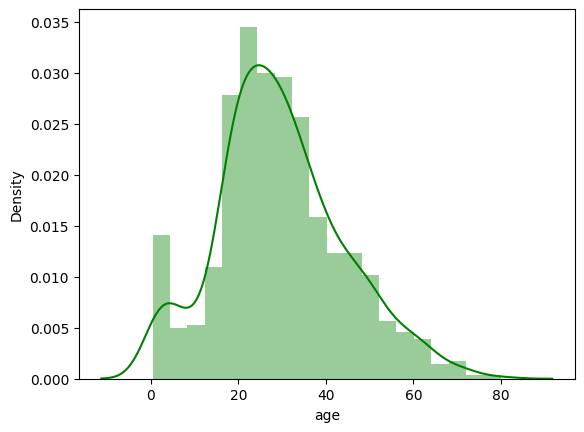

In [59]:
sns.distplot(titanic.age,bins=20,color='g')
plt.show()

<h3> 1.IQR :Inter Quartile Range over(age)

<h3> Q1: 25% value of the age column called as 1st quartile<br>
     Q3: 75% value of the age column called as 3rd Quartile

In [4]:
# Finding quartile values
q1=titanic.age.quantile(0.25)
q3=titanic.age.quantile(0.75)
q1,q3

(20.125, 38.0)

<h3>IQR :Inter Quartile Range is the difference between Q3 and Q1

In [5]:
iqr=q3-q1
iqr

17.875

<h3>Finding the lower whisker:Q1-1.5*IQR <BR>
    Finding the upper whisker:Q3+1.5*IQR

In [6]:
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
lower_whisker, upper_whisker

(-6.6875, 64.8125)

<h3>Finding the rows with outliers in age


In [8]:
titanic[(titanic['age']>upper_whisker) | (titanic['age']<lower_whisker)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


<h3>Removing outliers

In [9]:
data=titanic[(titanic['age']<upper_whisker) & (titanic['age']>lower_whisker)]

In [10]:
data.shape

(703, 15)

<h3>Plotting the Boxplot after removing the outliers

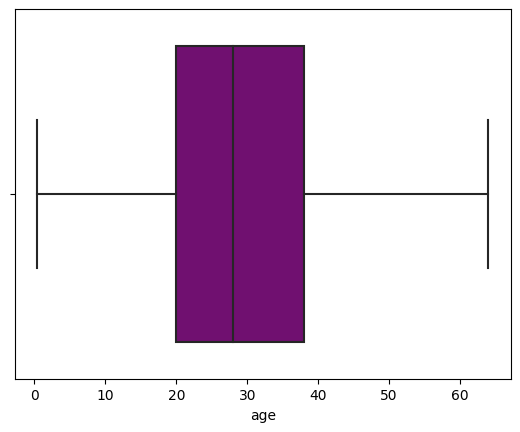

In [15]:
sns.boxplot(data=data,x='age',color='purple')
plt.show()

<h3>2.Z-score Method<br>
Z-score=mean()+threshold*std()<br>
Z-score indicates how many standard deviation away a data point is

In [17]:
titanic.head()
titanic.shape

(891, 15)

In [18]:
titanic.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [19]:
titanic['Z-Score']=(titanic.age-titanic.age.mean())/titanic.age.std()

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Z-Score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530005
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571430
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254646
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.364911
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.364911


<h3> Rows whose z-score value is greater than 3 and less than -3 are considered as outliers

In [21]:
titanic[(titanic['Z-Score']>3) | (titanic['Z-Score']<-3)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Z-Score
630,1,1,male,80.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True,3.462699
851,0,3,male,74.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True,3.049660


<h3>Removing the outliers

In [28]:
new_data=titanic[(titanic['Z-Score']<2) & (titanic['Z-Score']>-2)]

In [29]:
new_data.shape

(685, 16)

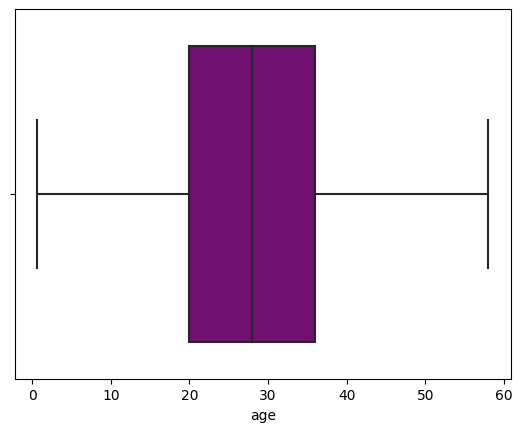

In [30]:
sns.boxplot(data=new_data,x='age',color='purple')
plt.show()

<H3>Percentile method

In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Z-Score
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530005
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571430
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254646
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.364911
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.364911


In [32]:
titanic.drop(columns=['Z-Score'],inplace=True)

In [45]:
min_threshold,max_threshold=titanic.age.quantile([0.05,0.95])
min_threshold,max_threshold

(4.0, 56.0)

In [46]:
titanic[(titanic.age>max_threshold) | (titanic.age<min_threshold)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
11,1,1,female,58.00,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
33,0,2,male,66.00,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,3,male,2.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
829,1,1,female,62.00,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False


In [47]:
no_outlier=titanic[(titanic.age<max_threshold) & (titanic.age>min_threshold)]

In [48]:
no_outlier.shape

(635, 15)

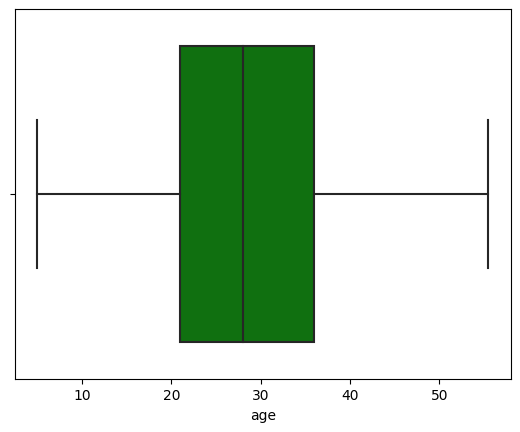

In [49]:
sns.boxplot(data=no_outlier,x='age',color='green')
plt.show()